In [135]:
import os
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

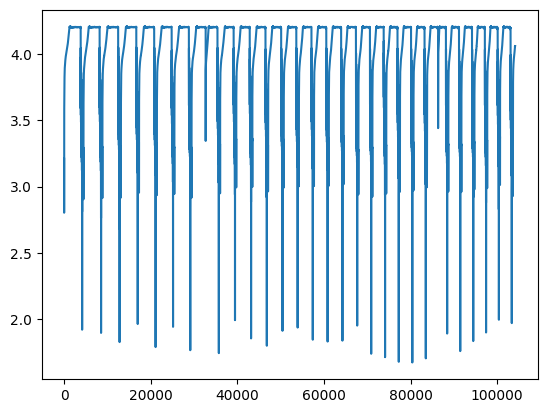

In [237]:
t = temp[temp['cycle_type']!='impedance'].reset_index(drop=True)

plt.plot(t['Voltage_measured'])
plt.show()

In [239]:
filelist = os.listdir("data/")

def read_mat_to_csv(path) :
    file_nm = path[5:-3]
    mat = scipy.io.loadmat(path)
    key = list(mat.keys())[-1]
    cycles = mat[key][0][0][0][0]

    # Prepare lists to hold extracted data
    all_cycles = []

    for cycle in cycles:
        cycle_type = cycle[0][0]  # Extract cycle type
        for item in cycle['data'][0]:
            measurements = {}
            # print(len(item[1][0]))
            measurements['cycle_type'] = [cycle_type]*len(item[0][0])
            measurements['Voltage_measured'] = item[0][0].flatten()
            measurements['Current_measured'] = item[1][0].flatten()
            measurements['Temperature_measured'] = item[2][0].flatten()
            measurements['Current_charge'] = item[3][0].flatten()
            measurements['Voltage_charge'] = item[4][0].flatten()
            measurements['Time'] = item[5][0].flatten()
            if len(item) > 6:
                measurements['Capacity'] = item[6][0].flatten()            
            all_cycles.append(measurements)
    
    df = pd.DataFrame(all_cycles)
    
    # capacity save
    df_c = df[['cycle_type','Time','Capacity']].copy()
    df_c['cycle_type'] = df_c['cycle_type'].apply(lambda x : x[0])
    df_c['Time'] = df_c['Time'].apply(lambda x : x[-1])
    df_c['Capacity'] = df_c['Capacity'].astype("float")
    df_c.to_csv("capacity/"+file_nm+'csv')

    result = pd.DataFrame(columns=df.columns[:6])
    #Full data
    #cycle num <- discharge
    for i in df.index :

        temp = pd.DataFrame([df.iloc[i,0], df.iloc[i,1], df.iloc[i,2],df.iloc[i,3],
                           df.iloc[i,4],df.iloc[i,5]]).transpose()
        temp.columns = df.columns[:6]
        result = pd.concat([result, temp])
    result.to_csv("experiment/"+file_nm+'csv')
    df.to_csv("preprocessing/"+file_nm+'csv')

for i in filelist :
    read_mat_to_csv("data/"+i)

temp

,cycle_type,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge
0,impedance,(864.8499145507812-33.30489730834961j),(292.906494140625-84.52355194091797j),(2.7559661048105535+0.681579790454108j),(0.14292000298919022-0.11910902095404614j),(0.09615681931482341-0.0033587529815028916j)
1,impedance,(858.3848266601562-42.13150405883789j),(300.4463806152344-75.87329864501953j),(2.7190404054425787+0.5464238254925992j),None,None
2,impedance,(856.7225341796875-49.78998565673828j),(300.31927490234375-68.13848114013672j),(2.748818738767326+0.4578805279052717j),None,None
3,impedance,(854.005859375-56.50114440917969j),(303.563232421875-61.265869140625j),(2.7392598820959084+0.3667176429152102j),None,None
4,impedance,(853.9482421875-55.32548522949219j),(306.69561767578125-55.26713180541992j),(2.7282638282435014+0.31124615372532904j),None,None
...,...,...,...,...,...,...
503,charge,4.06099,1.51094,28.040238,1.498,4.818
504,charge,NaN,NaN,NaN,1.5,4.818
505,charge,4.061758,1.511535,28.045899,1.5,4.818
506,charge,4.06197,1.509855,28.064045,1.5,4.818


In [244]:
temp['check'] = temp['cycle_type'].apply(lambda x : 1 if x=='charge' else (-1 if x=='discharge' else 0))

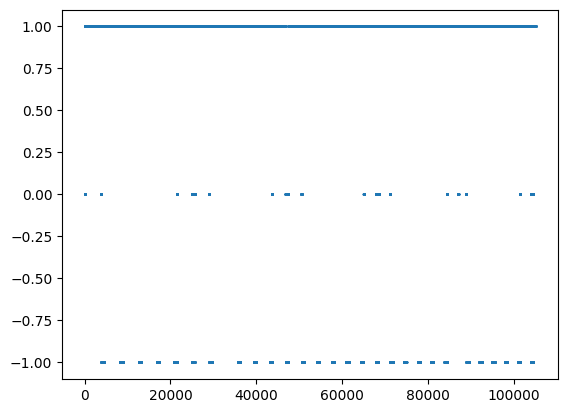

In [251]:
t = temp.reset_index(drop=True)
plt.scatter(t.index,t['check'], s=0.2)
plt.show()

In [183]:
tt = []

for i in temp.index :
    t = temp.loc[i,:]
    

In [130]:
df = pd.read_csv('preprocessing/'+filelist[0][:-3]+'csv').drop('Unnamed: 0',axis=1)
df.head()

,cycle_type,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity
0,impedance,[864.84991455-3.33048973e+01j 858.38482666-4.2...,[292.90649414 -84.52355194j 300.44638062 -75.8...,[2.7559661 +0.68157979j 2.71904041+0.54642383j...,[0.14292 -0.11910902j 0.17758987-0.10341436j...,[0.09615682-0.00335875j 0.09408578-0.00306803j...,[0.05064226],[0.10592231]
1,charge,[3.21079458 2.8024183 3.37146591 ... 4.207084...,[-1.23109553e-03 -3.04061888e+00 1.50885830e+...,[26.93533655 26.93664327 26.96010001 ... 26.46...,[-2.000e-03 -3.066e+00 1.498e+00 ... 3.200e-...,[3.000e-03 1.349e+00 4.067e+00 ... 4.240e+00 4...,[0.0000000e+00 2.5160000e+00 5.2040000e+00 ......,NaN
2,impedance,[841.10003662-3.10025005e+01j 836.77746582-4.3...,[316.92654419 -85.61573029j 320.78500366 -73.6...,[2.49805155+0.5770107j 2.50769234+0.43896211j...,[0.16756263-0.12849493j 0.1879003 -0.10358202j...,[0.07968687-0.00038903j 0.07513191-0.00011509j...,[0.05049807],[0.07744323]
3,discharge,[4.19683141 4.19696533 3.72847101 4.16610264 3...,[ 2.96006337e-04 -3.88997949e-04 -4.02504096e+...,[26.51514108 26.50379107 26.58547329 26.760213...,[4.000e-04 4.000e-04 3.996e+00 4.000e-04 3.996...,[ 0. 4.212 1.806 4.168 1.792 4.146 1....,[ 0. 9.36 19.547 29.5 39.469 ...,[1.84701116]
4,charge,[3.29460671 2.90422858 3.44683373 ... 4.206357...,[-1.81415771e-03 -3.18399166e+00 1.50919708e+...,[27.09905921 27.09211781 27.10880435 ... 26.22...,[-2.000e-03 -3.205e+00 1.498e+00 ... 2.300e-...,[3.000e-03 1.376e+00 4.159e+00 ... 4.234e+00 4...,[0.0000000e+00 2.4690000e+00 5.2340000e+00 ......,NaN


In [150]:
temp['Voltage_measured'] = temp['Voltage_measured'].replace('\n','').replace('[','')
temp['Voltage_measured'].split(' ')

['3.29401563',
 '2.92855568',
 '3.4164377',
 '',
 '3.44756777',
 '3.46873592',
 '3.48702697',
 '3.50307865',
 '3.517942',
 '',
 '',
 '3.53206193',
 '3.54527599',
 '3.55767959',
 '3.56933853',
 '3.58065659',
 '3.59152874',
 '3.60164416',
 '3.61148889',
 '3.6212033',
 '',
 '3.63022646',
 '3.63878719',
 '3.64746951',
 '3.65564285',
 '3.66339372',
 '3.67094721',
 '3.67827548',
 '3.6853197',
 '',
 '3.69234622',
 '3.6990138',
 '',
 '3.70548336',
 '3.71138684',
 '3.71808099',
 '3.72366898',
 '3.72943676',
 '3.73481015',
 '3.7408223',
 '',
 '3.74626344',
 '3.75137972',
 '3.75663666',
 '3.76187443',
 '3.76672352',
 '3.77120826',
 '3.77606741',
 '3.78057197',
 '3.78511776',
 '3.78921385',
 '3.79377832',
 '3.79770691',
 '3.80223289',
 '3.80627875',
 '3.80985177',
 '3.81402161',
 '3.81787015',
 '3.82122309',
 '3.82482888',
 '3.82823576',
 '3.83146703',
 '3.83506965',
 '3.8379316',
 '',
 '3.84111482',
 '3.84409546',
 '3.84671729',
 '3.84918005',
 '3.8518949',
 '',
 '3.85385491',
 '3.85620609',
 '3.

In [ ]:
tfor i in df.index :
    temp = df.loc[i,:]
    plt.plot(temp['Voltage_measured'])
    plt.show()
    plt.close()

In [105]:
df = pd.DataFrame(all_cycles)
data = pd.DataFrame(columns=df.columns)
for i in df.index :
    temp = df.loc[i,:]
    v = temp[1]
    c = temp[2]
    t = temp[3]
    cc = temp[4]
    vc = temp[5]
    time = temp[6]
    status = [df.loc[i,'cycle_type']]*len(v)

    t = pd.DataFrame(columns=df.columns, index=[i for i in range(len(v))])
    t.iloc[:,0] = status
    t.iloc[:,1] = v
    t.iloc[:,2] = c
    t.iloc[:,3] = t
    # t.iloc[:,4] = cc
    # t.iloc[:,5] = vc
    # t.iloc[:,6] = time

    data = pd.concat([data,t])


KeyboardInterrupt: 